In [1]:
from urllib.request import urlopen
import numpy as np
from PIL import Image
from io import StringIO
import cv2
from io import BytesIO

In [3]:
response = urlopen("http://localhost:5000/video_feed")
def getFrame():
    data = b''
    while 1:
        temp = response.read(4096)
        a = temp.find(b'e\r\nContent-Type: image/jpeg\r\n\r\n')
        b = temp.find(b'--frame')
        if(a==-1):
            data += temp
        else:
            head = temp[b+7:a]
            data = temp[a+31:]
            break
    num = int(head)
    left = num - (4096-a-31)
    data += response.read(left)
    return BytesIO(data)

In [175]:
for i in range(50):
    a = Image.open(getFrame())



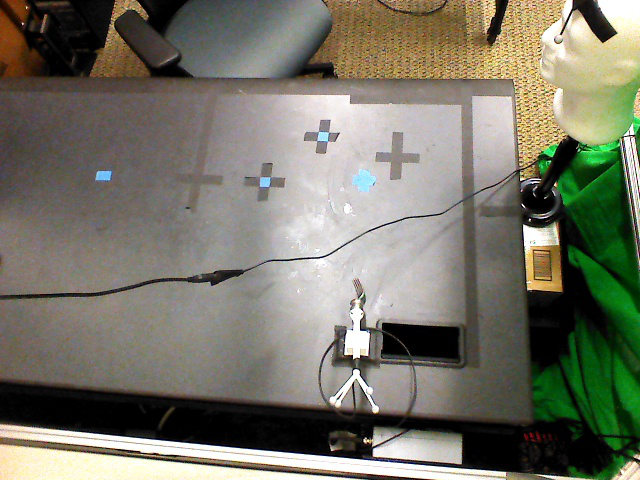

In [177]:
a = Image.open(getFrame())
a